## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("./ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
num_rows = df.shape[0]
num_rows

294478

c. The number of unique users in the dataset.

In [4]:
num_uniq_users = len(df["user_id"].unique())
num_uniq_users

290584

d. The proportion of users converted.

In [5]:
percent_converted = df["converted"].mean()
percent_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
treat_group = df[df["group"] == "treatment"]
treatment_mismatch = treat_group[treat_group["landing_page"] != "new_page"]
treatment_mismatch.shape[0]

1965

f. Do any of the rows have missing values?

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
correct_treatment_filter = (df["group"] == "treatment") & (df["landing_page"] == "new_page")
correct_control_filter = (df["group"] == "control") & (df["landing_page"] == "old_page")
df2 = df[correct_treatment_filter | correct_control_filter]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
len(df2["user_id"].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2["user_id"].duplicated()]["user_id"]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2["user_id"].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(subset=["user_id"], keep="first")
df2.duplicated(subset=["user_id"]).sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2["converted"].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_group = df2[df2["group"] == "control"]
control_group["converted"].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_group = df2[df2["group"] == "treatment"]
treatment_group["converted"].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
treatment_group.shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

While there is significant evidence that the new page is less effective at converting that the original, without testing the theory with solid statistical methods we cannot come to a sound conclusion

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$: The new page does not perform statistically better than the old page at converting visitors to customers. (**$p_{new}$** <= **$p_{old}$**)

$H_{1}$: The new page performs statistically better than the old page at converting visitors to customers. (**$p_{new}$** > **$p_{old}$**)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2["converted"].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2["converted"].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2[df2["group"] == "treatment"].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old =df2[df2["group"] == "control"].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
def get_page_converted():
  return np.random.choice([0,1],size=n_new,p=[1-p_new,p_new])

page_converted = get_page_converted()
page_converted.mean()

0.11873236528800496

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
def get_old_page_converted():
  return np.random.choice([0,1],size=n_old,p=[1-p_old,p_old])
old_page_converted = get_old_page_converted()
old_page_converted.mean()

0.11828682351969382

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
page_converted.mean() - old_page_converted.mean()

0.00044554176831114456

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
def get_diffs():
  return get_page_converted().mean()- get_old_page_converted().mean()

p_diffs = np.array([get_diffs() for _ in range(10000)])
p_diffs

array([ 0.00112714, -0.0025966 ,  0.00182166, ..., -0.00058009,
       -0.00206697, -0.00095177])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

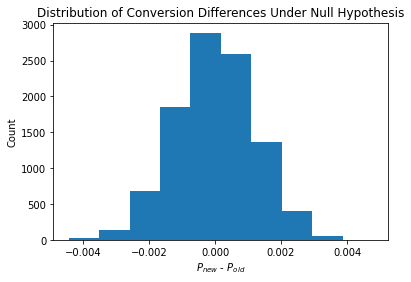

In [26]:
fig, ax = plt.subplots()
ax.set_title("Distribution of Conversion Differences Under Null Hypothesis")
ax.set_ylabel("Count")
ax.set_xlabel("$P_{new}$ - $P_{old}$")
ax.hist(p_diffs);

This histogram matches a normal distribution, which would be expected under the null hypothesis

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
actual_diff = treatment_group["converted"].mean() - control_group["converted"].mean()
over_actual = p_diffs[[diff > actual_diff for diff in p_diffs]]
len(over_actual) / 10000

0.9026

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We just computed the p-value, or the probability that the simulated results are greater than teh actual result. In this case there is a high p_value meaning the null hypothesis is likely true.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = control_group["converted"].sum()
convert_new = treatment_group["converted"].sum()
n_old = control_group.shape[0]
n_new = treatment_group.shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [29]:
sm.stats.proportions_ztest(convert_new, n_new, convert_old/n_old, alternative="larger")

(-1.859354929150913, 0.9685115770700896)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score tells us the mean score of the new page's converted rates is approximately 1.86 standard deviations less than the actual converted rate of the old page. This along with the p-value of approximately 0.97 tells us that it is most likely that the null hypothesis is true. This aligns with our previous assessment of the data.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should use Binary Logistic Regression in order to determine the odds of each response (converted vs not converted)

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df2["intercept"] = 1
df2["ab_page"] = (df2["group"] == "treatment").astype(int)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [31]:
logistic_reg = sm.Logit(df2["converted"], df2[["intercept","ab_page"]])
results = logistic_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:               8.077e-06
Time:                        16:38:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

The p-value in this case is 0.19, which is different from the p-values found in part 2 because this p-value measures whether or not the statistic is relevant to the result, rather than if it matches our alternate hypothesis, as we haven't specified the null or alternate in this model. That being said, it still supports the null hypothesis as it shows that there is still no statistically significant advantage tot using the new_page

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

By including other factors in our regression model we can get a more complete picture of how each factor affects the result, however it can also lead to an increased complexity of the model which can make the results hard to interpret, or if the factors are correlated with each other it can create deceptive results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [33]:
countries = pd.read_csv("./countries.csv")
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  290584 non-null  int64 
 1   country  290584 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [34]:
merged = pd.merge(df2,countries,on="user_id")
merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [35]:
dummies = pd.get_dummies(merged["country"])
dummies

,CA,UK,US
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
290579,0,0,1
290580,0,0,1
290581,0,0,1
290582,0,0,1


In [36]:
df2[["CA","UK"]] = dummies[["CA","UK"]] # We "dropped" US as our baseline by not including it here
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0.0,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0.0,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0.0,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0.0,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0.0,0.0


In [37]:
countries_reg = sm.Logit(df2["converted"], df2[["intercept","CA","UK"]], missing="drop")
results = countries_reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366156
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               286742
Model:                          Logit   Df Residuals:                   286739
Method:                           MLE   Df Model:                            2
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:               1.053e-05
Time:                        16:38:07   Log-Likelihood:            -1.0499e+05
converged:                       True   LL-Null:                   -1.0499e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3310
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9956      0.007   -290.328      0.000      -2.009      -1.982
CA             0.0329      0.026      1.249      0.212      -0.019       0.085
UK            -0.0086      0.013     -0.642      0.521      -0.035       0.018
==============================================================================
"""

From these results, specifically the p-values higher than our alpha (0.05), we can see that there is no statistically significant correlation between the country and the rate of conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [38]:
total_reg = sm.Logit(df2["converted"], df2[["intercept","ab_page","CA","UK"]], missing="drop")
results = total_reg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366152
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               286742
Model:                          Logit   Df Residuals:                   286738
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:               1.962e-05
Time:                        16:38:07   Log-Likelihood:            -1.0499e+05
converged:                       True   LL-Null:                   -1.0499e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2489
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9877      0.009   -222.140      0.000      -2.005      -1.970
ab_page       -0.0159      0.012     -1.381      0.167      -0.038       0.007
CA             0.0329      0.026      1.250      0.211      -0.019       0.085
UK            -0.0087      0.013     -0.645      0.519      -0.035       0.018
==============================================================================
"""

Overall these results still support the null hypothesis, with the `ab_page` category having the most correlation amongst the three independent variables, but still not being statistically significant. The intercept has a p-value of 0 which also helps support our null hypothesis.

<a id='conclusions'></a>
## Finishing Up

Now we just need to export this report in a user friendly format, running the code below converts this into a html page, viewable in a web browser

In [39]:
from subprocess import call
call(['jupyter', 'nbconvert', '--to','html','Analyze_ab_test_results_notebook.ipynb'])

0